In [ ]:
# STEP 1: Install Required Libraries
!pip install -q imbalanced-learn xgboost lightgbm

In [ ]:
# STEP 2: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# STEP 3: Upload Your Dataset
from google.colab import files
uploaded = files.upload()  # Upload 'heart_disease.csv'

Saving heart_disease.csv to heart_disease.csv


In [ ]:
# STEP 4: Load and Clean Data
df = pd.read_csv('heart_disease.csv')
df.dropna(inplace=True)

In [ ]:
# STEP 5: Define Target
if 'target' in df.columns:
    y = df['target']
elif 'num' in df.columns:
    y = (df['num'] > 0).astype(int)
else:
    raise ValueError("No 'target' or 'num' column found!")

In [ ]:
# STEP 6: Define Features
X = df.drop(columns=[col for col in df.columns if col.lower() in ['target', 'num']])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# STEP 7: Balance Classes with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [ ]:
# STEP 8: Reduce Dimensions with PCA
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_resampled)


In [ ]:
# STEP 9: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [ ]:
# STEP 10: Define & Train 6 Individual Models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=600, max_depth=16, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', learning_rate=0.015, max_depth=7, n_estimators=500, random_state=42),
    "SVC": SVC(kernel='rbf', C=3.0, gamma='auto', probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(C=1.0, solver='liblinear'),
    "LightGBM": LGBMClassifier(n_estimators=300, learning_rate=0.015, max_depth=7, random_state=42),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    print(f"🔹 {name}:\n  ✅ Accuracy: {acc*100:.2f}% | F1: {f1:.2f} | AUC: {auc:.2f}\n")

🔹 Random Forest:
  ✅ Accuracy: 94.14% | F1: 0.94 | AUC: 0.99



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:07:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔹 XGBoost:
  ✅ Accuracy: 95.05% | F1: 0.95 | AUC: 0.99

🔹 SVC:
  ✅ Accuracy: 95.50% | F1: 0.95 | AUC: 0.99

🔹 Logistic Regression:
  ✅ Accuracy: 94.14% | F1: 0.94 | AUC: 0.99

[LightGBM] [Info] Number of positive: 443, number of negative: 443
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 886, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# STEP 11: Final Stacking Model (6 Models Included)
stacking_model = StackingClassifier(
    estimators=[
        ('rf', models['Random Forest']),
        ('xgb', models['XGBoost']),
        ('svc', models['SVC']),
        ('lgbm', models['LightGBM']),
        ('nb', models['Naive Bayes']),
        ('lr', models['Logistic Regression'])
    ],
    final_estimator=LogisticRegression(C=1.0, solver='liblinear'),
    cv=5, n_jobs=-1
)

stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)
y_proba = stacking_model.predict_proba(X_test)[:, 1]

# FINAL METRICS
print("🧠 FINAL STACKING MODEL:")
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.2f}")

🧠 FINAL STACKING MODEL:
✅ Accuracy: 95.50%
F1 Score: 0.95
ROC AUC: 0.99


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


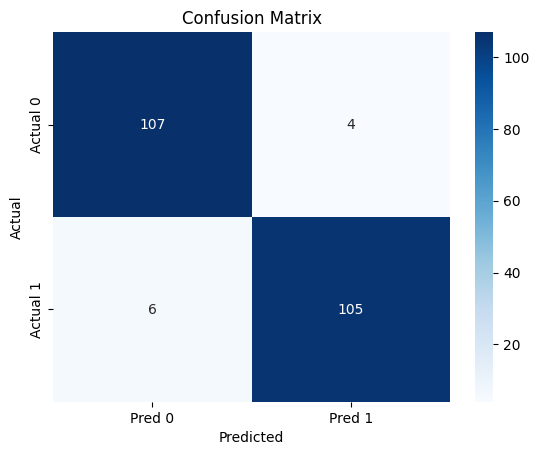

In [ ]:
# STEP 12: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

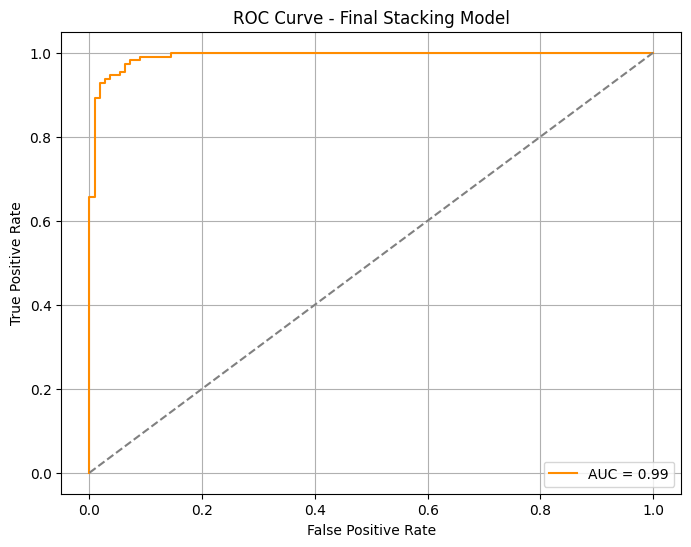

In [ ]:
# STEP 13: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Final Stacking Model')
plt.legend(loc='lower right')
plt.grid()
plt.show()